In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Assuming your CSV data is saved as 'data.csv'
data = pd.read_csv('data_processing/output.csv')

In [2]:
import tensorflow as tf

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("GPU:", gpu)
else:
    print("No GPU available, using CPU.")


GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
# Preprocessing
# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[['curr_attack', 'interrupted']])
encoded_labels = pd.get_dummies(data['mtd'])

# Combine one-hot encoded features with other numerical features
features = pd.concat([pd.DataFrame(encoded_features), data[['mtd_freq', 'compromised_num']]], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

In [4]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer: 4 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/Users/williamho/Downloads/kaggle_keras/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-02 11:32:03.315667: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-04-02 11:32:03.315686: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-02 11:32:03.315691: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-02 11:32:03.315717: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-02 11:32:03.315732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device

In [69]:
model.fit(X_train, y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4494 - mae: 0.3874
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3038 - mae: 0.2483
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3829 - mae: 0.3668
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5112 - mae: 0.2571
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4985 - mae: 0.2869
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2707 - mae: 0.2502
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3979 - mae: 0.1963
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2784 - mae: 0.2590
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2401 - mae: 0.2239
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2609 - mae: 0.2508
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2216 - mae: 0.2286
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2165 - mae: 0.1990
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/ste

In [70]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0327 - mae: 0.1298


[0.032660502940416336, 0.12983328104019165]

With metrics as target values

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [72]:
# Assuming your CSV data is saved as 'data.csv'
data = pd.read_csv('data_processing/metrics/simulation_metrics.csv')

In [73]:
import tensorflow as tf

# Assuming X_train and y_train are your training data and labels
# X_train.shape[1] is the number of features in your input data

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)  # Output layer with 3 neuron for regression
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Use mean squared error for regression
              metrics=['mae'])  # You can add additional metrics like Mean Absolute Error (MAE)


/Users/williamho/Downloads/kaggle_keras/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Preprocessing
# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[['curr_attack', 'interrupted', 'mtd']])
targets = data[['roa', 'impact', 'complexity']]

# Combine one-hot encoded features with other numerical features
features = pd.concat([pd.DataFrame(encoded_features), data.drop(['curr_attack', 'interrupted', 'mtd', 'roa', 'impact', 'complexity'], axis=1)], axis=1)
features = features.drop("x_10000", axis=1)
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [75]:
features

,0,1,2,3,4,5,6,7,8,9,...,x_5000,x_5500,x_6000,x_6500,x_7000,x_7500,x_8000,x_8500,x_9000,x_9500
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X_train, y_train

(      0    1    2    3    4    5    6    7    8    9  ...  x_5000  x_5500  \
 12  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...     0.0     0.0   
 4   0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...     0.0     0.0   
 37  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  ...     9.0     1.0   
 8   0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...     0.0     0.0   
 3   0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...     0.0     0.0   
 6   0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...     0.0     0.0   
 41  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...     9.0     1.0   
 46  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...     9.0     1.0   
 47  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...     9.0     1.0   
 15  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...     0.0     0.0   
 9   0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...     0.0     0.0   
 16  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...     0

In [60]:
model.fit(X_train, y_train,epochs=100)

Epoch 1/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 153.4276 - mae: 7.8626
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 154.4633 - mae: 5.2165
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 126.7452 - mae: 4.6622
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 127.3432 - mae: 5.4303
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 139.3602 - mae: 5.7040
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 134.5276 - mae: 5.5027
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 96.0942 - mae: 5.1513 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.2042 - mae: 4.4942 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.5975 - mae: 3.8508 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.2382 - mae: 3.5238 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 73.9646 - mae: 3.6873 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 107.6733 - mae: 3.1117
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

In [61]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1726 - mae: 0.3155
Test loss: 0.17256934940814972, Test accuracy: 0.31549137830734253


In [62]:
y_pred = model.predict(X_test)# Plot predicted vs actual values
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[17.439287  ,  4.6064115 ,  0.60653573],
       [10.202878  ,  4.605256  ,  0.8447328 ],
       [11.371645  ,  4.8558187 ,  0.816222  ],
       [ 9.653186  ,  4.4664125 ,  0.7556606 ],
       [14.166204  ,  4.3459797 ,  0.9513207 ],
       [ 9.811687  ,  4.5867662 ,  0.6965142 ],
       [10.9871855 ,  3.9520504 ,  0.42982465],
       [10.877791  ,  4.113431  ,  0.45708305],
       [10.146969  ,  4.2696075 ,  0.8372858 ],
       [13.465452  ,  4.4619637 ,  0.5617669 ]], dtype=float32)

In [63]:
import seaborn as sns

<Axes: >

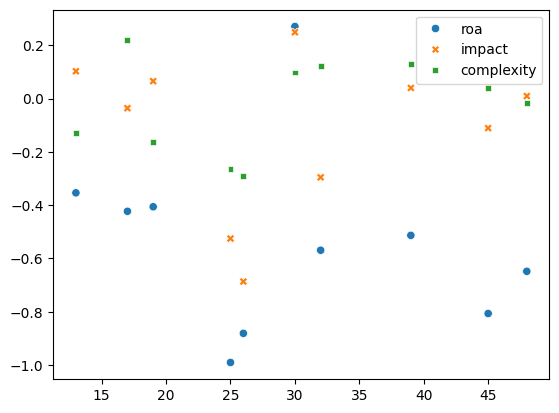

In [66]:
sns.scatterplot(y_pred - y_test)

In [67]:
(y_pred - y_test)['roa']

13   -0.353628
39   -0.513306
30    0.270994
45   -0.806823
17   -0.422978
48   -0.648322
26   -0.881224
25   -0.990618
32   -0.569215
19   -0.405921
Name: roa, dtype: float64